#Genetic Algorithms (GAs)

Genetic	Algorithms  (GAs) are	the most widely use form of evolutionary algorithms. They are more complex to implement than the local search heuristics but more popular due to their inspiration in natural evolution. Their performance can be improved by applying local search to their individuals or embeding knowledge of the problem into the search tj the individuals, or enbeding knowledge of the problem into the search operators. However, we will implement a simple GAs and hop that it will have better performance than the simpler local search heuristics.

##Algorithms work as follow
GA(*Fitness, Fitness_theshold, p, r, m*)
>*Fitness: A function that aasigns an evaluation score, given a hypothesis.*<br>
>*Fitness_theshold: A theshold specifying the termination criterion.*<br>
>*p: The number of hypothesiss to be included in the population*<br>
>*r: The function of population to be replaced by Crossover at each step*<br>
>*m: The mutation rate.* <br>

+ *Initailise population: P* $\leftarrow$ *p* hypothesises at random
+ *Evaluate:* For each h in P, compute *Fitness(h)*
+ While *[*$\underset{h}{\text{max}}$ *Fitness(h)] < Fitness_theshold* do

>*Create a new generation*, $P_s$:<br>
1.*Select*: Probabilistically select *(1-r)p* members of P to add to $P_s$. The probability Pr($h_i$) of selecting hypothesis $h_i$ from *P* is given by <br>
$Pr(h_i)=\dfrac{Fitness(h_i)}{\sum_{j=1}^{p}Fitness(h_i)}$<br>
2.*Crossover*: Probabiscally select $\dfrac{r \cdot p}{2}$ pairs of hypothesises from *P*, according to Pr($h_i$) given above. For each pair, < $h_1, h_2$ >, produce two offspring by applying the Crossover operator. Add all off spring to $P_s$.<br>
3.*Mutate*: Choose *m* percent of $P_s$ with uniform probability. For each, invert one randomly selected bit in its representation.<br>
4.*Update*: $P \leftarrow P_s$.<br>
5.*Evaluate*: for each h in P, compute *Fitness($h$)*<br>

+ Return the hypothesis from P that has the highest fitness.

*(Tom M. Mitchell, 1997)*

In [2]:
import urllib2 
import numpy as np
import pandas as pd
import random
import copy

input_data = []
url = "http://www.cs.stir.ac.uk/~goc/source/hard200.txt"
data = urllib2.urlopen(url) # it's a file like object and works just like a file
for line in data: # files are iterable
    input_data.append(map(int,line.split()))

total_items = input_data.pop(0)[0]
max_weight = input_data.pop()[0]
df = pd.DataFrame(input_data, columns=['no.', 'value', 'weight'])
df.head()

no.  value  weight
0    1    835     735
1    2   1670    1470
2    3   3340    2940
3    4   1087     987
4    5   1087     987

In [2]:
#function to generate a binary representation of the items selected. 
def binrep(n,r):
    return "{0:0{1}b}".format(n, r)
#random.randint(1, 2**instance_number)
weights = np.array(df["weight"])   
values = np.array(df["value"])

In [11]:
#initiate popoulation size and values
pop_size = 50
genes_selected = []
while pop_size>0:
    sample_selected = np.array(map(int,binrep(random.randint(1, 2**total_items), total_items)))
    genes_selected.append(sample_selected)
    pop_size -= 1

#print genes_selected

In [12]:
#evaluate population
arr_total_weights = np.dot(genes_selected, weights)
arr_total_values = np.dot(genes_selected, values)
for idx in xrange(0,arr_total_values.size):
    if arr_total_weights[idx]>max_weight:
        arr_total_values[idx]=0

#print arr_total_values

In [13]:
def tournament_selection(arr_total_values):
    #make a deep cpoy of arr_total_value
    tmp_total = copy.deepcopy(arr_total_values).tolist()
    #randomly select individual from population pool which value is not zeo
    ind1 = tmp_total.pop(random.randrange(len(tmp_total)))
    while ind1==0:
        ind1 = tmp_total.pop(random.randrange(len(tmp_total)))
    ind2 = tmp_total.pop(random.randrange(len(tmp_total)))
    while ind2==0:
        ind2 = tmp_total.pop(random.randrange(len(tmp_total)))
    #return better individual value
    if ind1>ind2:
        return ind1
    else:
        return ind2

#print tournament_selection(arr_total_values)

In [14]:
# function for crossover 
def crossover(mom,dad):
    cut = random.randint(0,len(mom)) 
    return np.append(mom[0:cut], dad[cut:]), np.append(dad[0:cut], mom[cut:])

In [ ]:
# function for mutation offspting
def mutate(offspring):
    idx = random.randint(0,len(offspring)-1)
    offspring[idx] = int(not offspring1[idx]) 
    return offspring

In [ ]:
#evaluate offspring
#return fitness of offspring (offspring_value)
def eval_offspring(offspring):
    offspring_weight = np.dot(offspring, weights)
    offspring_value = np.dot(offspring, values)
    if offspring_weight>max_weight:
        offspring_value = 0
    return offspring

In [15]:
#run genetic algorithm (GA)
generation = 500
lst_best_values = []
while generation>0:
    #select mom and dad from values population pool
    mom = tournament_selection(arr_total_values)
    dad = tournament_selection(arr_total_values)
    #select mom and dad genes that give good value fitness
    idx_mom = random.choice(np.where(arr_total_values==mom)[0])
    mom_genes = genes_selected[idx_mom]
    idx_dad = random.choice(np.where(arr_total_values==dad)[0])
    dad_genes = genes_selected[idx_dad]
    #perform crossover
    child1, child2 = crossover(mom_genes, dad_genes)
    #mutate offsprings
    child1 = mutate(child1)
    child2 = mutate(child2)
    #evaluate offsprings
    child1_value = eval_offspring(child1)
    child2_value = eval_offspring(child2)
    #replace worst
    inds = arr_total_values.argsort()
    inds = inds[::-1]
    arr_total_values = arr_total_values[inds]
    arr_total_weights = arr_total_weights[inds]
    tmp_genes = []
    for i in inds:
        tmp_genes.append(genes_selected[i])
    genes_selected = tmp_genes
    arr_total_values = np.append(arr_total_values[0:-2],[child1_value, child2_value])
    arr_total_weights = np.append(arr_total_weights[0:-2],[child1_weight, child2_weight])
    np.append(genes_selected[0:-2],[child1, child2])
    #keep record of best value found so far
    lst_best_values.append(arr_total_values[0])
    
    generation -= 1
print lst_best_values[-1]

132708


<function matplotlib.pyplot.show>

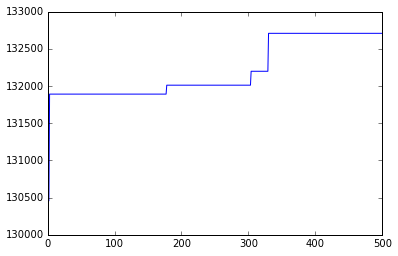

In [16]:
#best population values found so far
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(list(xrange(0,len(lst_best_values))), lst_best_values)
plt.show

<function matplotlib.pyplot.show>

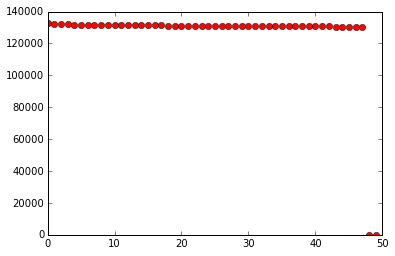

In [17]:
#last generation
plt.plot(list(xrange(0,len(arr_total_values))), arr_total_values, 'ro')
plt.show